In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_csv('results.csv',encoding = "utf-8")
print('This is the Results data')
results.head()

This is the Results data


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
status = pd.read_csv('status.csv',encoding = "utf-8")
print('This is the Status data')
status.head()

This is the Status data


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [4]:
# unique values and data points count
unique_counts = status.nunique()
data_points = status.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

          Unique Values  Total Data Points
statusId            139                139
status              139                139


In [5]:
# Combining datasets for a full view
merged_data = pd.merge(results, status, on='statusId')

# View this data
merged_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished


In [6]:
# Counting the n(Finish)
finishes = merged_data[merged_data['status'] == 'Finished'].shape[0]

# Counting n(Total Race Starts)
total_races = merged_data.shape[0]


# Calculating the probability ie. P(Finish)
prob_finish = finishes / total_races
print(f"Zooming in, the probability of finishing a race is {prob_finish:.2f}. Vroom vroom!")

Zooming in, the probability of finishing a race is 0.28. Vroom vroom!


In [7]:
# Accident-prone or smooth sailing?
accidents_count = merged_data[merged_data['status'] == 'Accident'].shape[0]
engine_failures = merged_data[merged_data['status'] == 'Engine'].shape[0]

# Crunching the numbers
probability_accident = accidents_count / total_races
probability_engine_failure = engine_failures / total_races

print(f"Watch out! The probability of an accident is {probability_accident:.3f}.")
print(f"And the chances of an engine waving a white flag? {probability_engine_failure:.3f}.")


Watch out! The probability of an accident is 0.040.
And the chances of an engine waving a white flag? 0.077.


In [8]:
# Calculate the frequency of each status
status_counts = merged_data['status'].value_counts()

# Calculate the probability of each status by dividing the count by the total number of entries
probabilities = status_counts / total_races

# Print the probabilities for each status
print("Probabilities for each status:")
print(probabilities)

# Sum up the probabilities to check if they add up to 1
total_probability = probabilities.sum()
print("\nTotal Probability:", total_probability)

Probabilities for each status:
status
Finished          0.279488
+1 Lap            0.149160
Engine            0.077044
+2 Laps           0.061039
Accident          0.040145
                    ...   
Launch control    0.000038
Tyre puncture     0.000038
+26 Laps          0.000038
CV joint          0.000038
Crankshaft        0.000038
Name: count, Length: 137, dtype: float64

Total Probability: 1.0


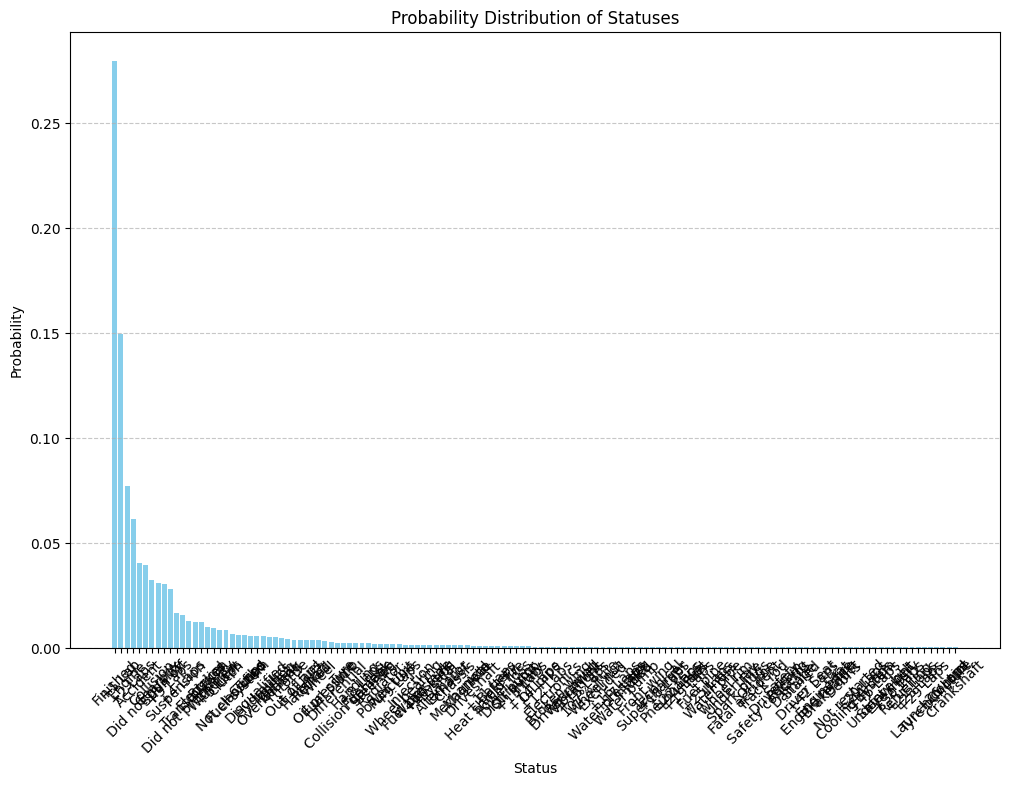

In [9]:
import matplotlib.pyplot as plt

# Assuming 'probabilities' is a pandas Series with the status as the index and the probability as the value
probabilities = status_counts / total_races  # Your calculated probabilities

# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(probabilities.index, probabilities.values, color='skyblue')  # You can change the color

plt.title('Probability Distribution of Statuses')  # Title of the chart
plt.xlabel('Status')  # X-axis label
plt.ylabel('Probability')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the X-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability, customize as needed

# Show the plot
plt.show()


In [12]:
# Map status to status_id
status_to_id = merged_data.drop_duplicates(subset=['status'])[['status', 'statusId']].set_index('status')['statusId']
# Map the probabilities index (status) to status_id
probabilities.index = probabilities.index.map(status_to_id)

probabilities.index

Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       ...
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype='float64', name='status', length=137)

Status 1 not found in probabilities index.
Status 11 not found in probabilities index.
Status 5 not found in probabilities index.
Status 12 not found in probabilities index.
Status 3 not found in probabilities index.
Status 81 not found in probabilities index.
Status 4 not found in probabilities index.
Status 6 not found in probabilities index.
Status 20 not found in probabilities index.
Status 13 not found in probabilities index.
Status 22 not found in probabilities index.
Status 14 not found in probabilities index.
Status 97 not found in probabilities index.
Status 7 not found in probabilities index.
Status 10 not found in probabilities index.
Status 23 not found in probabilities index.
Status 54 not found in probabilities index.
Status 15 not found in probabilities index.
Status 8 not found in probabilities index.
Status 62 not found in probabilities index.
Status 69 not found in probabilities index.
Status 16 not found in probabilities index.
Status 101 not found in probabilities i

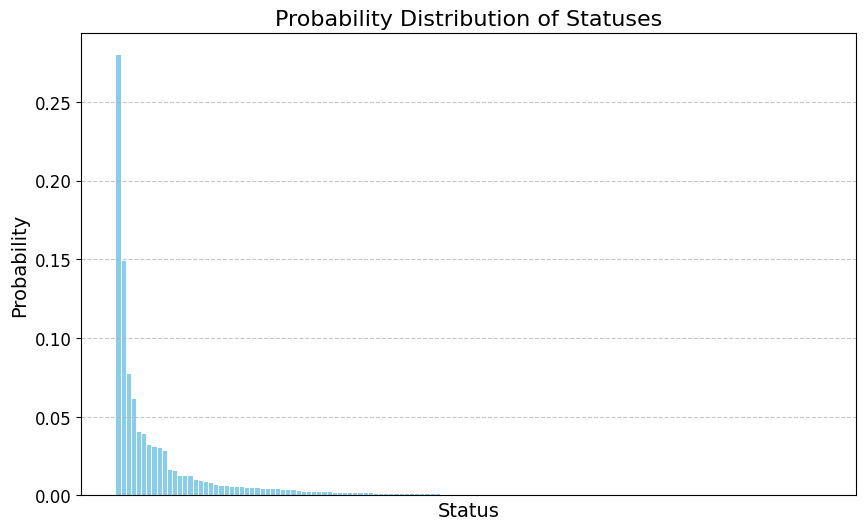

In [11]:
# Set the probability threshold
probability_threshold = 0.05

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(probabilities.index.astype(str), probabilities.values, color='skyblue')

plt.title('Probability Distribution of Statuses', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Probability', fontsize=14)

# Initialize empty lists for x-ticks and labels
xticks = []
xticklabels = []

for bar, status in zip(bars, probabilities.index):
    # Ensure the status is in string format if your index is string
    status_str = str(status)  # Convert to string if necessary
    
    # Check if the status exists in the probabilities index to avoid KeyError
    if status_str in probabilities.index:
        probability = probabilities[status_str]
        if probability > probability_threshold:
            xticks.append(bar.get_x() + bar.get_width() / 2)
            xticklabels.append(status_str)
        else:
            xticklabels.append('')
    else:
        print(f"Status {status_str} not found in probabilities index.")  # For debugging

plt.xticks(ticks=xticks, labels=xticklabels, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
